# What infuences the annual income of workers?

    We all know that an individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.
    

In this task you should use Pandas to answer a few questions about the [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) dataset.

> dataset: `Ex_1.6._adult.csv`

**Key information:**

Fields
The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: 50K
Number of attributes: 14
-- These are the demographics and other features to describe a person

Unique values of features:
- `age`: continuous
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)


import warnings
warnings.filterwarnings('ignore')

In [67]:
import sys
sys.path.insert(0, '/Users/khanh/Desktop/AW/_functions_')

from function_eda import *

In [68]:
path_to_file = '../../_module1_/datasets/Students_turn/Ex1.6._adult.csv'
data = pd.read_csv(path_to_file)
data

age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capitalgain  capitalloss  hoursperweek  native-country  salary  
0         Male         2174            0            40   United-States   <=50K  
1         Male            0            0            13   United-States   <=50K  
2         Male            0            0            40   United-States   <=50K  
3         Male            0            0            40   United-States   <=50K  
4       Female            0            0            40            Cuba   <=50K  
...        ...          ...          ...           ...             ...     ...  
32556   Female            0            0            38   United-States   <=50K  
32557     Male            0            0            40   United-States    >50K  
32558   Female            0            0            40   United-States   <=50K  
32559     Male            0            0            20   United-States   <=50K  
32560   Female        15024            0            40   United-States    >50K  

[32561 rows x 15 columns]

# Exercise 1. Open the file with a text editor or excel and note the first impressions of the file. In addition, list the different variables that this dataset contains with the keys and type (numerical, categorical...)


In [69]:
get_column_names(data)


Numerical variables are:
 Index(['age', 'fnlwgt', 'education-num', 'capitalgain', 'capitalloss',
       'hoursperweek'],
      dtype='object')
-------------------------------------------------
Categorical variables are:
 Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')
-------------------------------------------------


(Index(['age', 'fnlwgt', 'education-num', 'capitalgain', 'capitalloss',
        'hoursperweek'],
       dtype='object'),
 Index(['workclass', 'education', 'marital-status', 'occupation',
        'relationship', 'race', 'sex', 'native-country', 'salary'],
       dtype='object'))

In [70]:
num_var, cat_var = get_column_names(data)


Numerical variables are:
 Index(['age', 'fnlwgt', 'education-num', 'capitalgain', 'capitalloss',
       'hoursperweek'],
      dtype='object')
-------------------------------------------------
Categorical variables are:
 Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')
-------------------------------------------------


In [71]:
num_var

Index(['age', 'fnlwgt', 'education-num', 'capitalgain', 'capitalloss',
       'hoursperweek'],
      dtype='object')

In [72]:
cat_var

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capitalgain     32561 non-null  int64 
 11  capitalloss     32561 non-null  int64 
 12  hoursperweek    32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [74]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hoursperweek      0
native-country    0
salary            0
dtype: int64

In [75]:
columns = data.columns
columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capitalgain', 'capitalloss', 'hoursperweek', 'native-country',
       'salary'],
      dtype='object')

In [76]:
## Rename all columns to have a better view & understanding
new_columns = {'age': 'Age', 'workclass': 'Workclass', 'education': 'Education', 'education-num': 'Education Num', 'marital-status': 'Marital Status', 'occupation': 'Occupation','relationship':'Relationship','race':'Race','sex':'Sex','capitalgain':'Capital Gain','capitalloss':'Capital Loss','hoursperweek':'Hours per week','native-country':'Country','salary':'Salary'}
data = data.rename(columns=new_columns)
data

Age          Workclass  fnlwgt    Education  Education Num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            Marital Status          Occupation    Relationship    Race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital Gain  Capital Loss  Hours per week         Country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       Salary  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [77]:
data.rename(columns={'Material Status': 'Marital Status'}, inplace=True)
data

Age          Workclass  fnlwgt    Education  Education Num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            Marital Status          Occupation    Relationship    Race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital Gain  Capital Loss  Hours per week         Country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       Salary  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

# Exercise 2. How many men and women (`sex` feature) are represented in this dataset?

In [78]:
print("Number of Male and Female")
data['Sex'].value_counts()

Number of Male and Female


 Male      21790
 Female    10771
Name: Sex, dtype: int64

# Exercise 3. What is the average age (`age` feature) of women?

In [79]:
data.groupby(['Sex'])['Age'].mean()

Sex
 Female    36.858230
 Male      39.433547
Name: Age, dtype: float64

In [80]:
print("The average age of women is")
ave_female_age = data.groupby('Sex',as_index=False)['Age'].mean()
ave_female_age.iloc[:1,:]

The average age of women is


Sex       Age
0   Female  36.85823

# Exercise 4. Which is the most common nacionality (`native-country` feature)?  What is the proportion of German citizens?

In [81]:
print("Most common nationality is")
data['Country'].mode()[0] # United States

Most common nationality is


' United-States'

In [82]:
germany_proportion = (data[data['Country']==" Germany"]['Country'].count())/(data['Country'].count()) * 100
print("The proportion of German citizens is",germany_proportion)

The proportion of German citizens is 0.42074874850281013


# Exercise 5. What are mean value and standard deviation of the age of those who recieve more than 50K per year (`salary` feature) and those who receive less than 50K per year? 

In [83]:
data['Salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: Salary, dtype: int64

In [84]:
data_d = data.groupby(['Salary'])['Age'].describe()
data_d

count       mean        std   min   25%   50%   75%   max
Salary                                                             
 <=50K  24720.0  36.783738  14.020088  17.0  25.0  34.0  46.0  90.0
 >50K    7841.0  44.249841  10.519028  19.0  36.0  44.0  51.0  90.0

In [85]:
data_d.loc[:,"mean":"std"]

mean        std
Salary                      
 <=50K  36.783738  14.020088
 >50K   44.249841  10.519028

<function matplotlib.pyplot.show(close=None, block=None)>

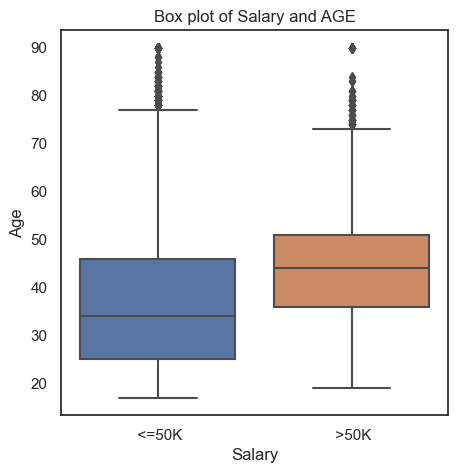

In [21]:
fig = plt.figure(figsize=(5,5))
sns.boxplot(x='Salary',y='Age',data=data).set_title('Box plot of Salary and AGE')
#blue_patch = mpatches.patch(color='blue',label='class_1')
#orange_patch = mpatches.patch(color='orange',label='class_2')
#plt.legend(handels=[blue_patch,orange_patch],loc=1)
plt.show

# Group <=50k has lower median age (35yo), higher income group has higher median age (45yo)

# Exercise 6. Is it true that people who receive more than 50k have at least high school education? (`education` feature).  

In [86]:
data["Education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [87]:
data["Education"].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [88]:
education_more_than_50K = data[data["Salary"]==" >50K"]['Education'].value_counts()
education_more_than_50K.sort_values(ascending=False)
# It's not true that people who receive more than 50k have at least high school education however the majority has high school educations. 

 Bachelors       2221
 HS-grad         1675
 Some-college    1387
 Masters          959
 Prof-school      423
 Assoc-voc        361
 Doctorate        306
 Assoc-acdm       265
 10th              62
 11th              60
 7th-8th           40
 12th              33
 9th               27
 5th-6th           16
 1st-4th            6
Name: Education, dtype: int64

# Exercise 7. Display statistics of age for each race (`race` feature) and each gender. Use `groupby()` and `describe()`. 

    Find the maximum age of men of Amer-Indian-Eskimo race.

In [89]:
data.groupby(['Race','Sex']).describe().T

Race                  Amer-Indian-Eskimo                 Asian-Pac-Islander  \
Sex                               Female           Male              Female   
Age            count          119.000000     192.000000          346.000000   
               mean            37.117647      37.208333           35.089595   
               std             13.114991      12.049563           12.300845   
               min             17.000000      17.000000           17.000000   
               25%             27.000000      28.000000           25.000000   
               50%             36.000000      35.000000           33.000000   
               75%             46.000000      45.000000           43.750000   
               max             80.000000      82.000000           75.000000   
fnlwgt         count          119.000000     192.000000          346.000000   
               mean        112950.731092  125715.364583       147452.075145   
               std          93207.974077   85063.251595        76401.627757   
               min          12285.000000   13769.000000        19914.000000   
               25%          31387.000000   48197.750000        86879.250000   
               50%          87950.000000  113091.000000       131986.000000   
               75%         163027.500000  182656.000000       175705.750000   
               max         445168.000000  356015.000000       379046.000000   
Education Num  count          119.000000     192.000000          346.000000   
               mean             9.697479       9.072917           10.390173   
               std              2.334540       2.268587            2.796647   
               min              2.000000       2.000000            1.000000   
               25%              9.000000       9.000000            9.000000   
               50%             10.000000       9.000000           10.000000   
               75%             11.000000      10.000000           13.000000   
               max             16.000000      16.000000           15.000000   
Capital Gain   count          119.000000     192.000000          346.000000   
               mean           544.605042     675.260417          778.436416   
               std           2451.591587    2929.745443         7675.228631   
               min              0.000000       0.000000            0.000000   
               25%              0.000000       0.000000            0.000000   
               50%              0.000000       0.000000            0.000000   
               75%              0.000000       0.000000            0.000000   
               max          15024.000000   27828.000000        99999.000000   
Capital Loss   count          119.000000     192.000000          346.000000   
               mean            14.462185      46.395833           50.852601   
               std            157.763811     286.562584          296.529225   
               min              0.000000       0.000000            0.000000   
               25%              0.000000       0.000000            0.000000   
               50%              0.000000       0.000000            0.000000   
               75%              0.000000       0.000000            0.000000   
               max           1721.000000    1980.000000         2258.000000   
Hours per week count          119.000000     192.000000          346.000000   
               mean            36.579832      42.197917           37.439306   
               std             11.046509      11.596280           12.479459   
               min              4.000000       3.000000            1.000000   
               25%             35.000000      40.000000           35.000000   
               50%             40.000000      40.000000           40.000000   
               75%             40.000000      45.000000           40.000000   
               max             84.000000      84.000000           99.000000   

Race                                         Blac

In [90]:
amer_ind_esk_data = data[(data['Race']==" Amer-Indian-Eskimo") & (data['Sex']==" Male")]
amer_ind_esk_data
amer_ind_esk_data["Age"].max()
print("The maximum age of male from Amer-Indian-Eskimo race is",amer_ind_esk_data["Age"].max())

The maximum age of male from Amer-Indian-Eskimo race is 82


# Exercise 8. Among whom the proportion of those who earn a lot(>50K) is more: among married or single men (`marital-status` feature)? 

    
    Consider married those who have a `marital-status` starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.

In [91]:
data['Marital Status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [92]:
total = data['Workclass'].count()
total

32561

In [93]:
male_married = data[data['Marital Status'].isin([' Married-civ-spouse', ' Married-spouse-absent',' Married-AF-spouse']) & (data['Sex'] == ' Male')]
male_married

Age          Workclass  fnlwgt      Education  Education Num  \
1       50   Self-emp-not-inc   83311      Bachelors             13   
3       53            Private  234721           11th              7   
7       52   Self-emp-not-inc  209642        HS-grad              9   
9       42            Private  159449      Bachelors             13   
10      37            Private  280464   Some-college             10   
...    ...                ...     ...            ...            ...   
32550   43   Self-emp-not-inc   27242   Some-college             10   
32551   32            Private   34066           10th              6   
32552   43            Private   84661      Assoc-voc             11   
32554   53            Private  321865        Masters             14   
32557   40            Private  154374        HS-grad              9   

            Marital Status          Occupation Relationship  \
1       Married-civ-spouse     Exec-managerial      Husband   
3       Married-civ-spouse   Handlers-cleaners      Husband   
7       Married-civ-spouse     Exec-managerial      Husband   
9       Married-civ-spouse     Exec-managerial      Husband   
10      Married-civ-spouse     Exec-managerial      Husband   
...                    ...                 ...          ...   
32550   Married-civ-spouse        Craft-repair      Husband   
32551   Married-civ-spouse   Handlers-cleaners      Husband   
32552   Married-civ-spouse               Sales      Husband   
32554   Married-civ-spouse     Exec-managerial      Husband   
32557   Married-civ-spouse   Machine-op-inspct      Husband   

                      Race    Sex  Capital Gain  Capital Loss  Hours per week  \
1                    White   Male             0             0              13   
3                    Black   Male             0             0              40   
7                    White   Male             0             0              45   
9                    White   Male          5178             0              40   
10                   Black   Male             0             0              80   
...                    ...    ...           ...           ...             ...   
32550                White   Male             0             0              50   
32551   Amer-Indian-Eskimo   Male             0             0              40   
32552                White   Male             0             0              45   
32554                White   Male             0             0              40   
32557                White   Male             0             0              40   

              Country  Salary  
1       United-States   <=50K  
3       United-States   <=50K  
7       United-States    >50K  
9       United-States    >50K  
10      United-States    >50K  
...               ...     ...  
32550   United-States   <=50K  
32551   United-States   <=50K  
32552   United-States   <=50K  
32554   United-States    >50K  
32557   United-States    >50K  

[13541 rows x 15 columns]

In [94]:
male_married_more_than_50K = male_married[male_married['Salary']==" >50K"]['Workclass'].count()
male_married_more_than_50K

5965

In [95]:
male_unmarried = data[data['Marital Status'].isin([' Never-married', ' Divorced', ' Separated',' Widowed' ]) & (data['Sex'] == ' Male')]
male_unmarried

Age          Workclass  fnlwgt      Education  Education Num  \
0       39          State-gov   77516      Bachelors             13   
2       38            Private  215646        HS-grad              9   
13      32            Private  205019     Assoc-acdm             12   
16      25   Self-emp-not-inc  176756        HS-grad              9   
17      32            Private  186824        HS-grad              9   
...    ...                ...     ...            ...            ...   
32537   30            Private  345898        HS-grad              9   
32548   65   Self-emp-not-inc   99359    Prof-school             15   
32553   32            Private  116138        Masters             14   
32555   22            Private  310152   Some-college             10   
32559   22            Private  201490        HS-grad              9   

       Marital Status          Occupation    Relationship  \
0       Never-married        Adm-clerical   Not-in-family   
2            Divorced   Handlers-cleaners   Not-in-family   
13      Never-married               Sales   Not-in-family   
16      Never-married     Farming-fishing       Own-child   
17      Never-married   Machine-op-inspct       Unmarried   
...               ...                 ...             ...   
32537   Never-married        Craft-repair   Not-in-family   
32548   Never-married      Prof-specialty   Not-in-family   
32553   Never-married        Tech-support   Not-in-family   
32555   Never-married     Protective-serv   Not-in-family   
32559   Never-married        Adm-clerical       Own-child   

                      Race    Sex  Capital Gain  Capital Loss  Hours per week  \
0                    White   Male          2174             0              40   
2                    White   Male             0             0              40   
13                   Black   Male             0             0              50   
16                   White   Male             0             0              35   
17                   White   Male             0             0              40   
...                    ...    ...           ...           ...             ...   
32537                Black   Male             0             0              46   
32548                White   Male          1086             0              60   
32553   Asian-Pac-Islander   Male             0             0              11   
32555                White   Male             0             0              40   
32559                White   Male             0             0              20   

              Country  Salary  
0       United-States   <=50K  
2       United-States   <=50K  
13      United-States   <=50K  
16      United-States   <=50K  
17      United-States   <=50K  
...               ...     ...  
32537   United-States   <=50K  
32548   United-States   <=50K  
32553          Taiwan   <=50K  
32555   United-States   <=50K  
32559   United-States   <=50K  

[8249 rows x 15 columns]

In [96]:
unmarried_more_than_50K = male_unmarried[male_unmarried['Salary']==" >50K"]['Workclass'].count()
unmarried_more_than_50K

697

In [97]:
male_married_prop = male_married_more_than_50K/total * 100
male_unmarried_prop = unmarried_more_than_50K/total * 100
print("The earning ratio from married male is", male_married_prop)
print("----------")
print("The earning ratio from unmarried male is", male_unmarried_prop)

The earning ratio from married male is 18.319461932987316
----------
The earning ratio from unmarried male is 2.140597647492399


# Exercise 9. What is the maximum number of hours a person works per week (`hours-per-week` feature)? How many people work such a number of hours and what is the percentage of those who earn a lot among them?  


In [98]:
# Maxium number of hours per week
data['Hours per week'].max()
print("Maximum hours per week is", data['Hours per week'].max())

Maximum hours per week is 99


In [99]:
# Number of people work 99 hours per week in this dataset
total_99h = data[data['Hours per week']==99]['Workclass'].count()
print("Number of people work 99 hours per week is",total_99h)

Number of people work 99 hours per week is 85


In [100]:
people_99h = data[data['Hours per week']==99]
people_99h

Age          Workclass  fnlwgt      Education  Education Num  \
935     37            Private  176900        HS-grad              9   
1172    25            Private  404616        Masters             14   
1887    55   Self-emp-not-inc  184425   Some-college             10   
3578    37       Self-emp-inc  382802      Doctorate             16   
4086    50                  ?  174964           10th              6   
...    ...                ...     ...            ...            ...   
30992   40       Self-emp-inc  104235        Masters             14   
31681   43            Private  266324        HS-grad              9   
31699   43   Self-emp-not-inc  163108   Some-college             10   
32469   58       Self-emp-inc  181974      Doctorate             16   
32531   30                  ?   33811      Bachelors             13   

            Marital Status        Occupation    Relationship  \
935     Married-civ-spouse      Craft-repair         Husband   
1172    Married-civ-spouse   Farming-fishing   Not-in-family   
1887    Married-civ-spouse   Farming-fishing         Husband   
3578    Married-civ-spouse    Prof-specialty         Husband   
4086    Married-civ-spouse                 ?         Husband   
...                    ...               ...             ...   
30992        Never-married     Other-service       Own-child   
31681   Married-civ-spouse      Craft-repair         Husband   
31699   Married-civ-spouse   Farming-fishing         Husband   
32469        Never-married    Prof-specialty   Not-in-family   
32531        Never-married                 ?   Not-in-family   

                      Race      Sex  Capital Gain  Capital Loss  \
935                  White     Male             0             0   
1172                 White     Male             0             0   
1887                 White     Male             0             0   
3578                 Black     Male             0             0   
4086                 White     Male             0             0   
...                    ...      ...           ...           ...   
30992                White     Male             0             0   
31681                White     Male             0          1902   
31699                White     Male             0             0   
32469                White   Female             0             0   
32531   Asian-Pac-Islander   Female             0             0   

       Hours per week         Country  Salary  
935                99   United-States    >50K  
1172               99   United-States    >50K  
1887               99   United-States    >50K  
3578               99   United-States    >50K  
4086               99   United-States   <=50K  
...               ...             ...     ...  
30992              99   United-States   <=50K  
31681              99   United-States    >50K  
31699              99   United-States   <=50K  
32469              99               ?   <=50K  
32531              99   United-States   <=50K  

[85 rows x 15 columns]

In [101]:
low_salary = (people_99h['Salary'] == ' <=50K').sum()
good_salary = (people_99h['Salary'] == ' >50K').sum()
print("Number of people who work 99 hours/week and low salary is",low_salary)
print("-----")
print("Number of people who work 99 hours/week and good salary is",good_salary)

Number of people who work 99 hours/week and low salary is 60
-----
Number of people who work 99 hours/week and good salary is 25


In [102]:
# Percentage of good salary and low salary out of total. 
good_prop = good_salary/total_99h * 100
low_prop = low_salary/total_99h * 100
print("The percentage of low salary is", low_prop)
print("-----")
print("The percentage of good salary is", good_prop)

The percentage of low salary is 70.58823529411765
-----
The percentage of good salary is 29.411764705882355


In [103]:
sample_data_20 = data.sample(20)

Text(0.5, 1.0, 'Hours per week vs Salary')

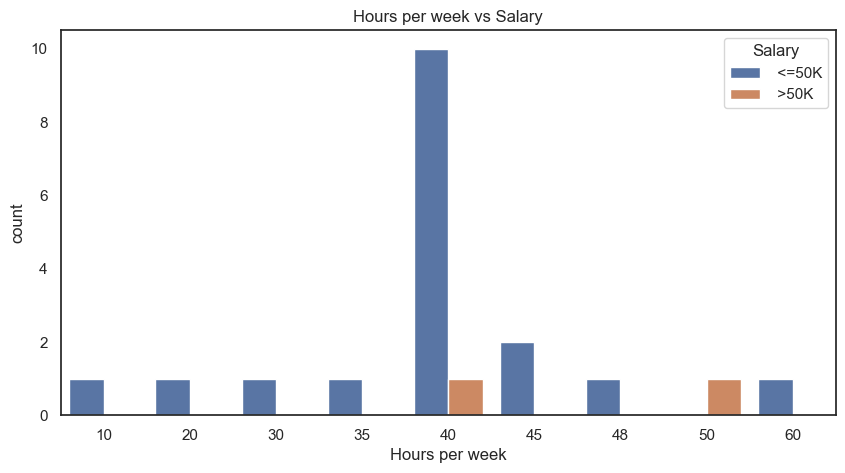

In [104]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='Hours per week',hue ='Salary',data=sample_data_20).set_title("Hours per week vs Salary")

# Exercise 10. Count the average time of work (`hours-per-week`) those who earning a little and a lot (`salary`) for each country (`native-country`).


In [105]:
more_than_50K = data[data['Salary']==" >50K"]
more_than_50K

Age          Workclass  fnlwgt      Education  Education Num  \
7       52   Self-emp-not-inc  209642        HS-grad              9   
8       31            Private   45781        Masters             14   
9       42            Private  159449      Bachelors             13   
10      37            Private  280464   Some-college             10   
11      30          State-gov  141297      Bachelors             13   
...    ...                ...     ...            ...            ...   
32539   71                  ?  287372      Doctorate             16   
32545   39          Local-gov  111499     Assoc-acdm             12   
32554   53            Private  321865        Masters             14   
32557   40            Private  154374        HS-grad              9   
32560   52       Self-emp-inc  287927        HS-grad              9   

            Marital Status          Occupation    Relationship  \
7       Married-civ-spouse     Exec-managerial         Husband   
8            Never-married      Prof-specialty   Not-in-family   
9       Married-civ-spouse     Exec-managerial         Husband   
10      Married-civ-spouse     Exec-managerial         Husband   
11      Married-civ-spouse      Prof-specialty         Husband   
...                    ...                 ...             ...   
32539   Married-civ-spouse                   ?         Husband   
32545   Married-civ-spouse        Adm-clerical            Wife   
32554   Married-civ-spouse     Exec-managerial         Husband   
32557   Married-civ-spouse   Machine-op-inspct         Husband   
32560   Married-civ-spouse     Exec-managerial            Wife   

                      Race      Sex  Capital Gain  Capital Loss  \
7                    White     Male             0             0   
8                    White   Female         14084             0   
9                    White     Male          5178             0   
10                   Black     Male             0             0   
11      Asian-Pac-Islander     Male             0             0   
...                    ...      ...           ...           ...   
32539                White     Male             0             0   
32545                White   Female             0             0   
32554                White     Male             0             0   
32557                White     Male             0             0   
32560                White   Female         15024             0   

       Hours per week         Country Salary  
7                  45   United-States   >50K  
8                  50   United-States   >50K  
9                  40   United-States   >50K  
10                 80   United-States   >50K  
11                 40           India   >50K  
...               ...             ...    ...  
32539              10   United-States   >50K  
32545              20   United-States   >50K  
32554              40   United-States   >50K  
32557              40   United-States   >50K  
32560              40   United-States   >50K  

[7841 rows x 15 columns]

In [106]:
more_than_50K.groupby(['Country']).agg('Hours per week').mean().sort_values()

Country
 Guatemala             36.666667
 Nicaragua             37.500000
 China                 38.900000
 Poland                39.000000
 Vietnam               39.200000
 Puerto-Rico           39.416667
 Laos                  40.000000
 Peru                  40.000000
 Cambodia              40.000000
 Trinadad&Tobago       40.000000
 Jamaica               41.100000
 Portugal              41.500000
 Cuba                  42.440000
 Haiti                 42.750000
 Philippines           43.032787
 England               44.533333
 Germany               44.977273
 El-Salvador           45.000000
 Hong                  45.000000
 Italy                 45.400000
 United-States         45.505369
 ?                     45.547945
 Canada                45.641026
 India                 46.475000
 Mexico                46.575758
 Scotland              46.666667
 Taiwan                46.800000
 Dominican-Republic    47.000000
 Iran                  47.500000
 Japan                 47.958333
 I

In [107]:
lower_than_50K = data[data['Salary']==" <=50K"]
lower_than_50K

Age          Workclass  fnlwgt      Education  Education Num  \
0       39          State-gov   77516      Bachelors             13   
1       50   Self-emp-not-inc   83311      Bachelors             13   
2       38            Private  215646        HS-grad              9   
3       53            Private  234721           11th              7   
4       28            Private  338409      Bachelors             13   
...    ...                ...     ...            ...            ...   
32553   32            Private  116138        Masters             14   
32555   22            Private  310152   Some-college             10   
32556   27            Private  257302     Assoc-acdm             12   
32558   58            Private  151910        HS-grad              9   
32559   22            Private  201490        HS-grad              9   

            Marital Status          Occupation    Relationship  \
0            Never-married        Adm-clerical   Not-in-family   
1       Married-civ-spouse     Exec-managerial         Husband   
2                 Divorced   Handlers-cleaners   Not-in-family   
3       Married-civ-spouse   Handlers-cleaners         Husband   
4       Married-civ-spouse      Prof-specialty            Wife   
...                    ...                 ...             ...   
32553        Never-married        Tech-support   Not-in-family   
32555        Never-married     Protective-serv   Not-in-family   
32556   Married-civ-spouse        Tech-support            Wife   
32558              Widowed        Adm-clerical       Unmarried   
32559        Never-married        Adm-clerical       Own-child   

                      Race      Sex  Capital Gain  Capital Loss  \
0                    White     Male          2174             0   
1                    White     Male             0             0   
2                    White     Male             0             0   
3                    Black     Male             0             0   
4                    Black   Female             0             0   
...                    ...      ...           ...           ...   
32553   Asian-Pac-Islander     Male             0             0   
32555                White     Male             0             0   
32556                White   Female             0             0   
32558                White   Female             0             0   
32559                White     Male             0             0   

       Hours per week         Country  Salary  
0                  40   United-States   <=50K  
1                  13   United-States   <=50K  
2                  40   United-States   <=50K  
3                  40   United-States   <=50K  
4                  40            Cuba   <=50K  
...               ...             ...     ...  
32553              11          Taiwan   <=50K  
32555              40   United-States   <=50K  
32556              38   United-States   <=50K  
32558              40   United-States   <=50K  
32559              20   United-States   <=50K  

[24720 rows x 15 columns]

In [108]:
lower_than_50K.groupby(['Country']).agg('Hours per week').mean().sort_values()

Country
 Hungary                       31.300000
 Taiwan                        33.774194
 Honduras                      34.333333
 Peru                          35.068966
 El-Salvador                   36.030928
 Nicaragua                     36.093750
 Haiti                         36.325000
 Trinadad&Tobago               37.058824
 Vietnam                       37.193548
 China                         37.381818
 Canada                        37.914634
 Cuba                          37.985714
 Ecuador                       38.041667
 Philippines                   38.065693
 Poland                        38.166667
 India                         38.233333
 Jamaica                       38.239437
 Puerto-Rico                   38.470588
 Columbia                      38.684211
 United-States                 38.799127
 Germany                       39.139785
 Hong                          39.142857
 Guatemala                     39.360656
 Scotland                      39.444444
 Italy  

# Exercise 11. Deal with the possible missing values 

In [109]:
data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education Num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours per week    0
Country           0
Salary            0
dtype: int64

In [110]:
data['Occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [111]:
data['Country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [112]:
data = data.replace('[?]', np.nan, regex=True)
data['Country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [113]:
data['Occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [114]:
data['Workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [115]:
data.isnull().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education Num        0
Marital Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per week       0
Country            583
Salary               0
dtype: int64

In [116]:
# missing data ratio 
data.isnull().sum() / data.shape[0] * 100.00

Age               0.000000
Workclass         5.638647
fnlwgt            0.000000
Education         0.000000
Education Num     0.000000
Marital Status    0.000000
Occupation        5.660146
Relationship      0.000000
Race              0.000000
Sex               0.000000
Capital Gain      0.000000
Capital Loss      0.000000
Hours per week    0.000000
Country           1.790486
Salary            0.000000
dtype: float64

In [117]:
data['Workclass'].fillna("Unavailable", inplace=True)
data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
Unavailable           1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [118]:
data['Occupation'].fillna("Unknown", inplace=True)
data['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
Unknown               1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [119]:
data['Country'].fillna("Unknown", inplace=True)
data['Country'].value_counts()

 United-States                 29170
 Mexico                          643
Unknown                          583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

# Exercise 12. Can you extract more infor from the dataset the annual income?

In [120]:
data

Age          Workclass  fnlwgt    Education  Education Num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            Marital Status          Occupation    Relationship    Race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital Gain  Capital Loss  Hours per week         Country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       Salary  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [121]:
cat_data = data.select_dtypes(include=['object'])

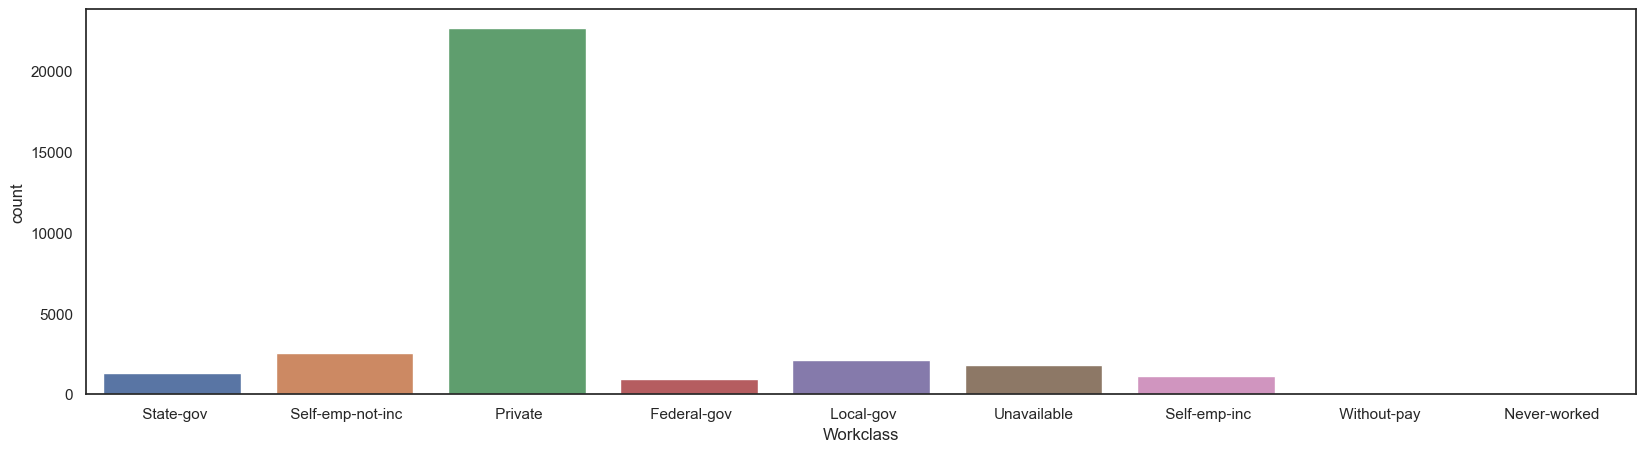

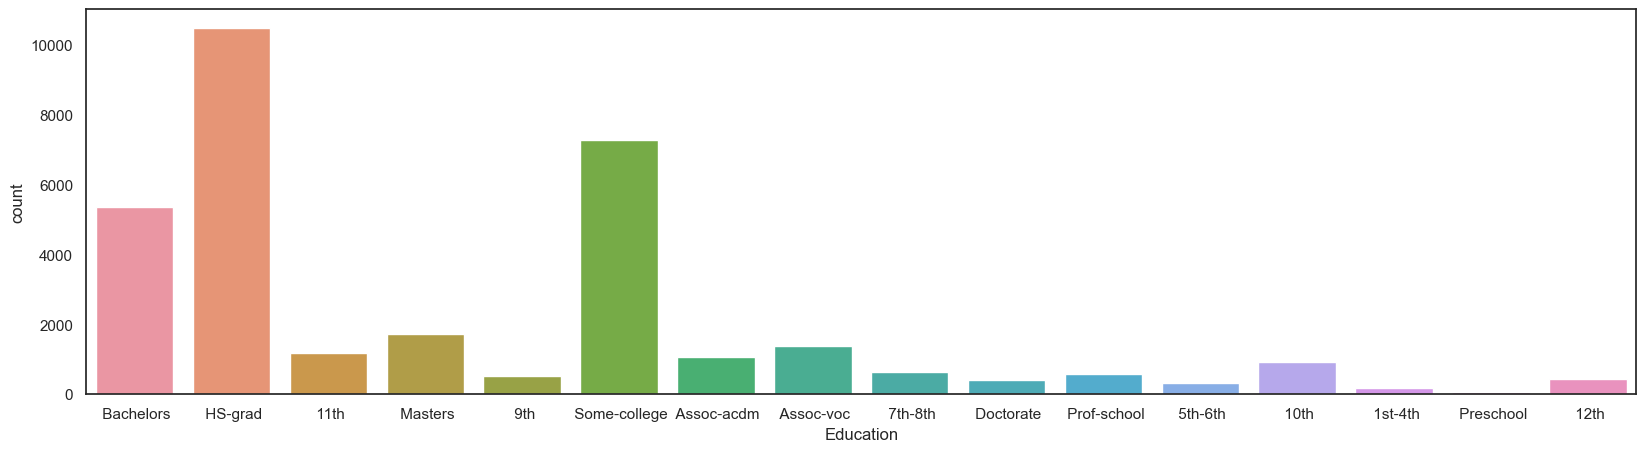

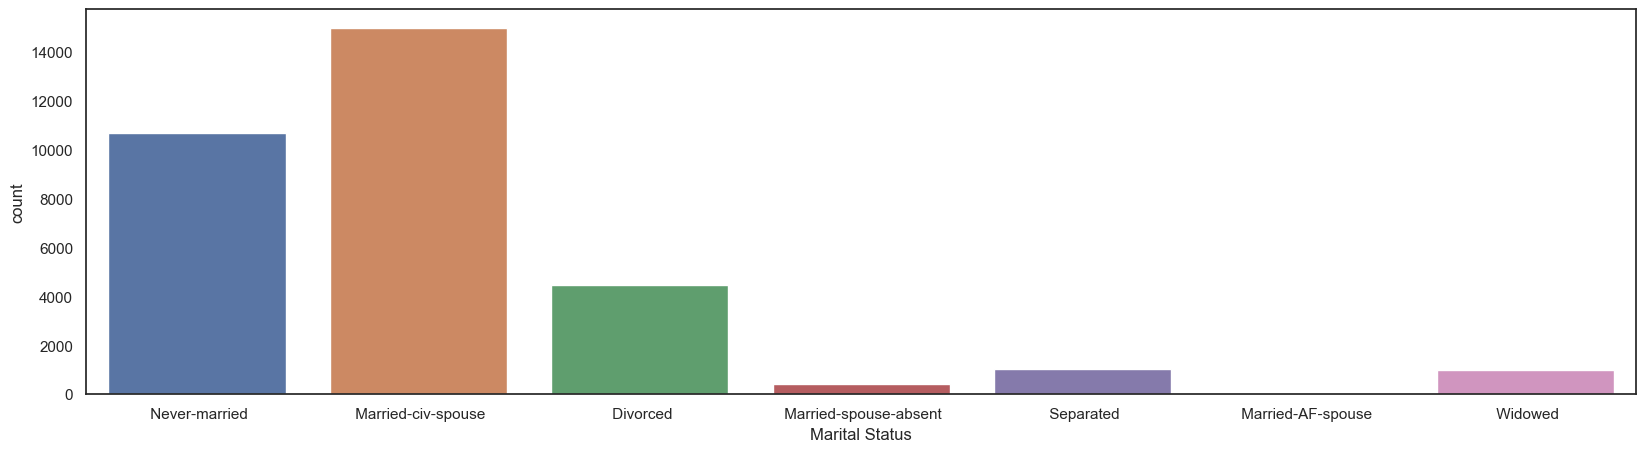

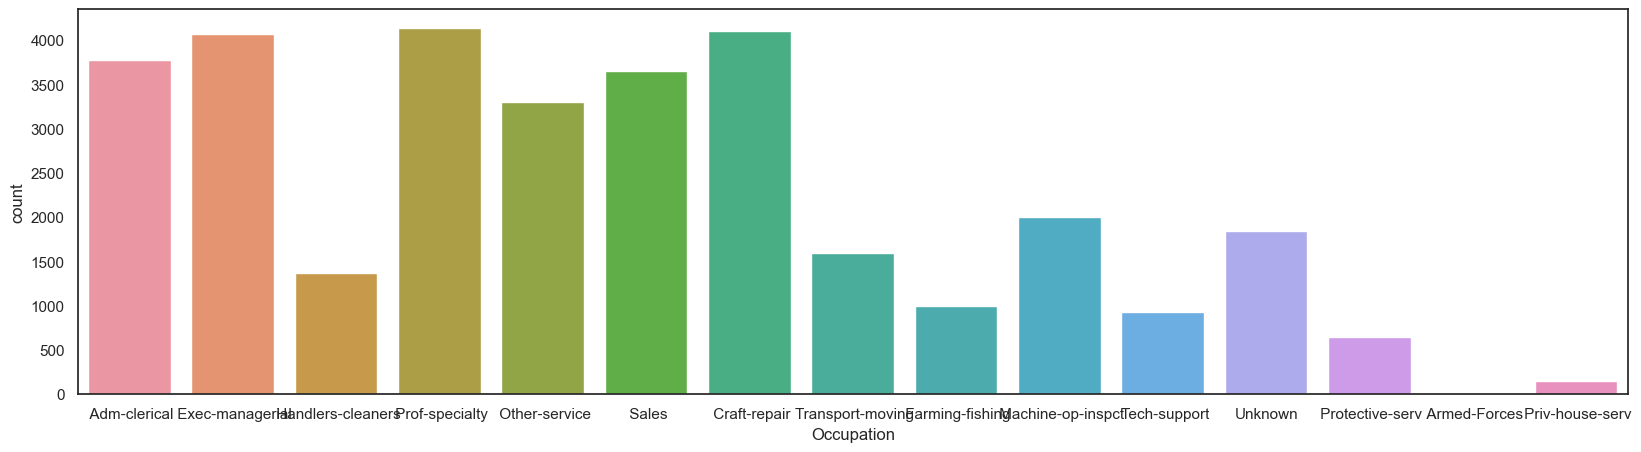

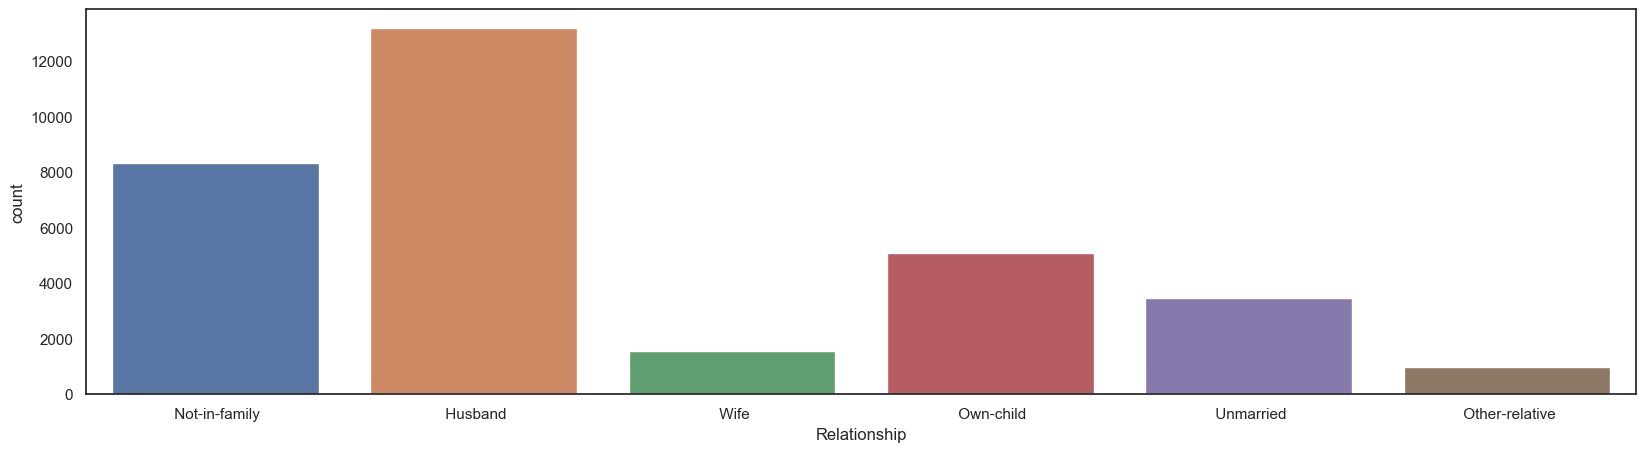

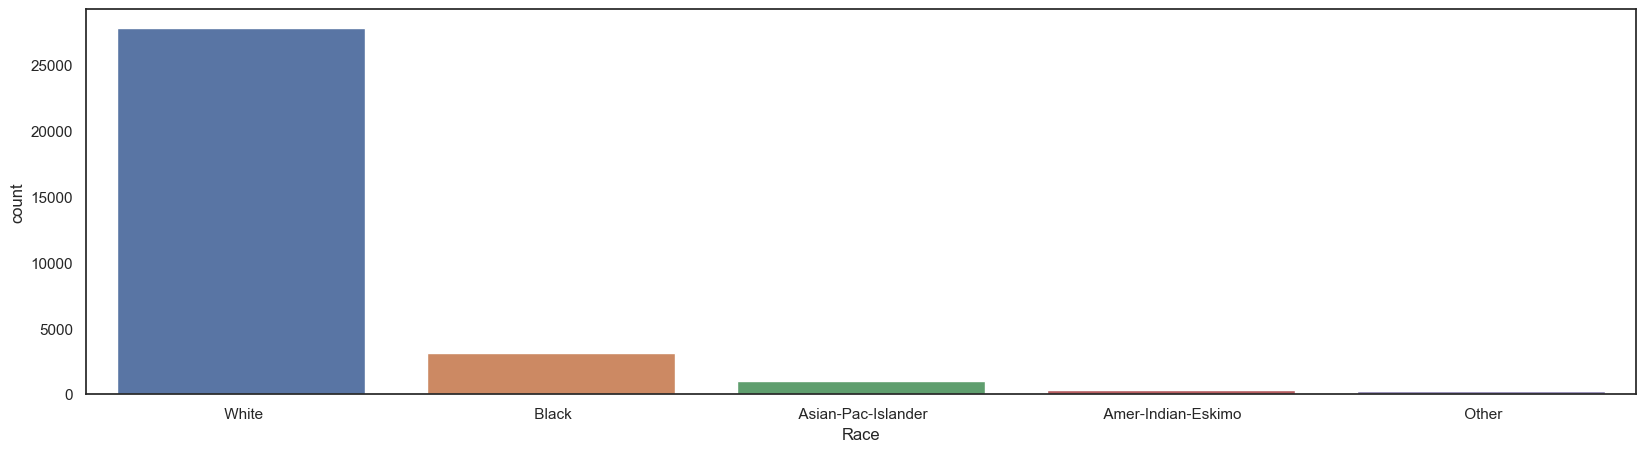

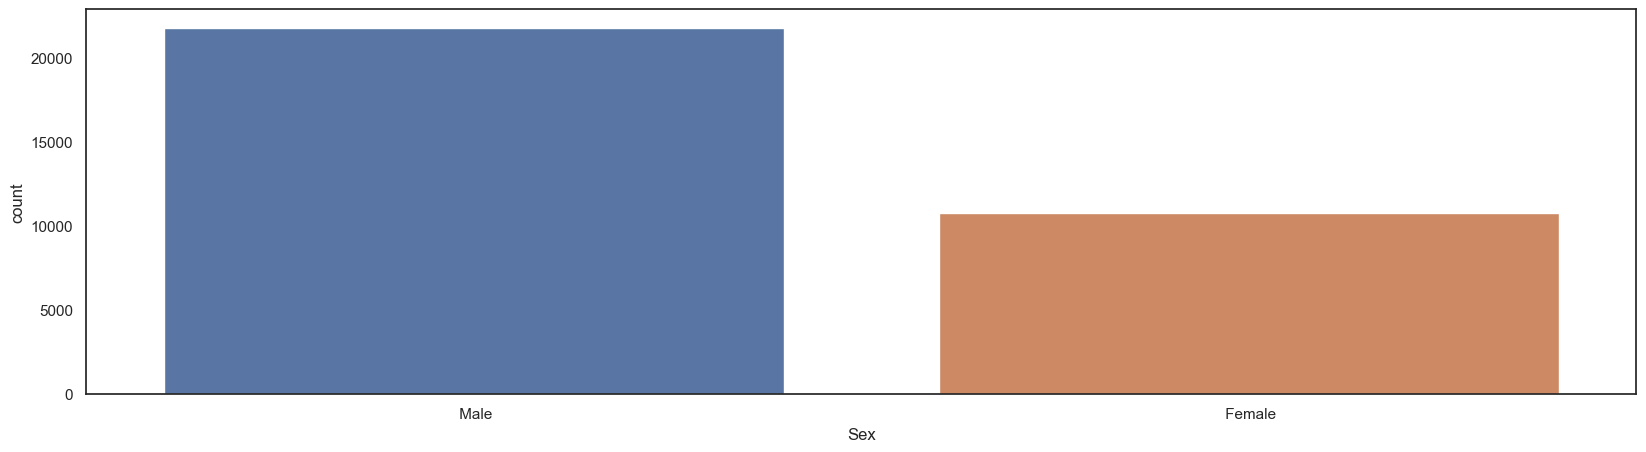

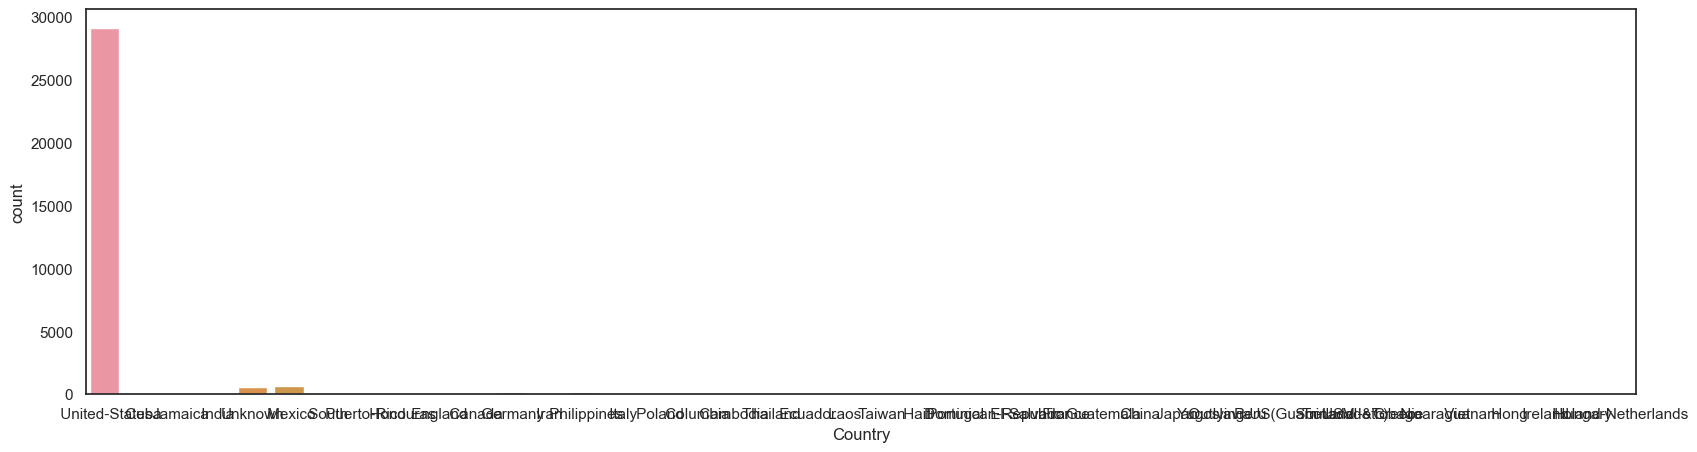

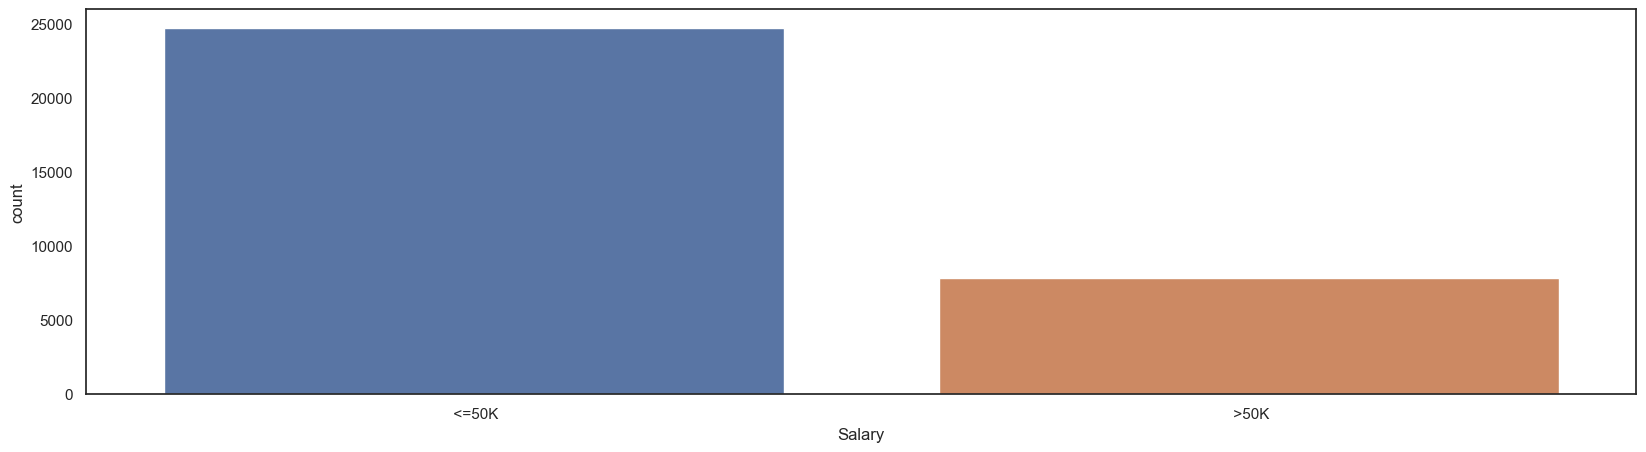

In [58]:
# Distributions of all varibles. 
for i in cat_data.columns:
    plt.figure(figsize=(20, 5))
    sns.countplot(data= cat_data, x= i)

# Fixing some of categorical variables

# Workclass

<AxesSubplot:xlabel='Workclass', ylabel='count'>

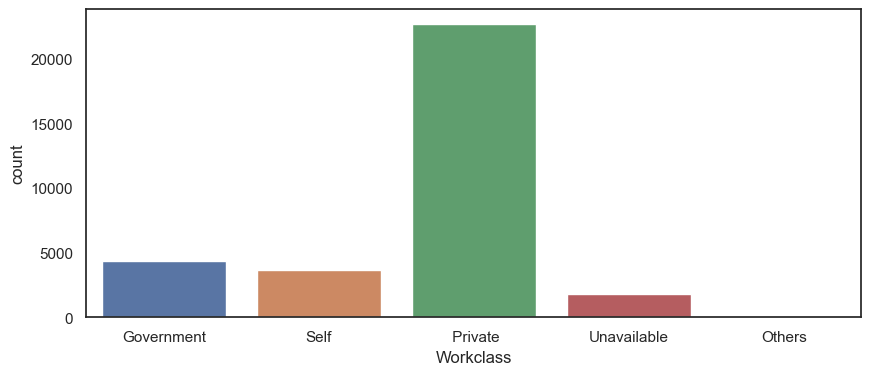

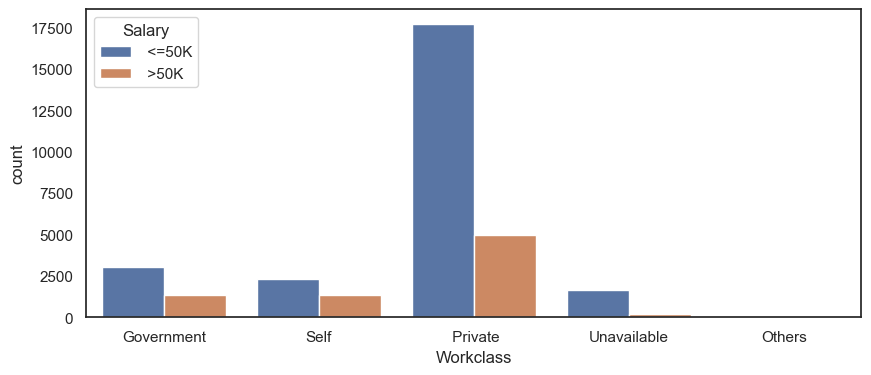

In [122]:
data['Workclass'].replace([' State-gov', ' Federal-gov', ' Local-gov'], 'Government', inplace=True)
data['Workclass'].replace([' Self-emp-not-inc', ' Self-emp-inc'], 'Self', inplace=True)
data['Workclass'].replace([' Without-pay', ' Never-worked'], 'Others', inplace=True)

plt.figure(figsize=(10, 4))
sns.countplot(data=data, x='Workclass')

plt.figure(figsize=(10, 4))
sns.countplot(data=data, x='Workclass', hue='Salary')

. A number of people who work for private companies earn more than 50k/year is high
. followed by working for themselves
. People work for government don't earn a lot, high income from this section is a minority
. Obviously people don't work, they will not earn a lot. 

# Education

In [123]:
data['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

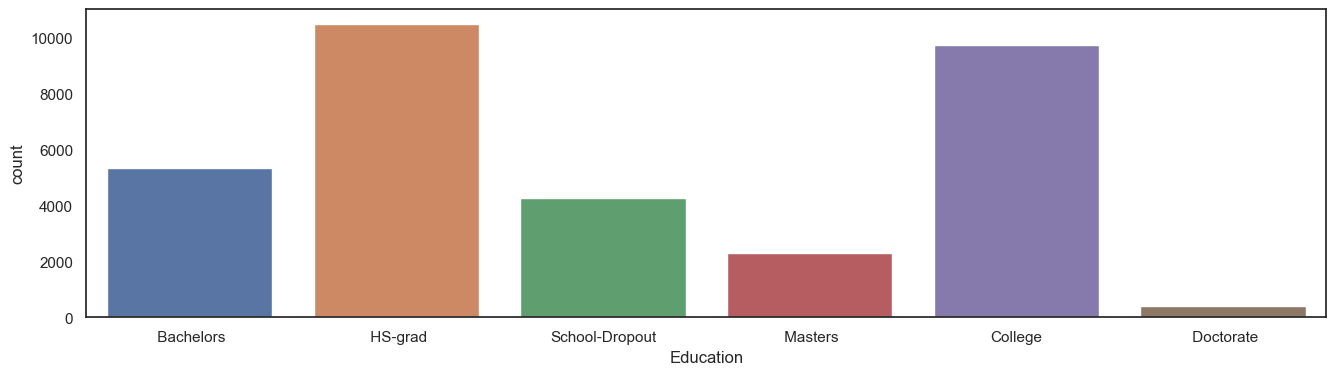

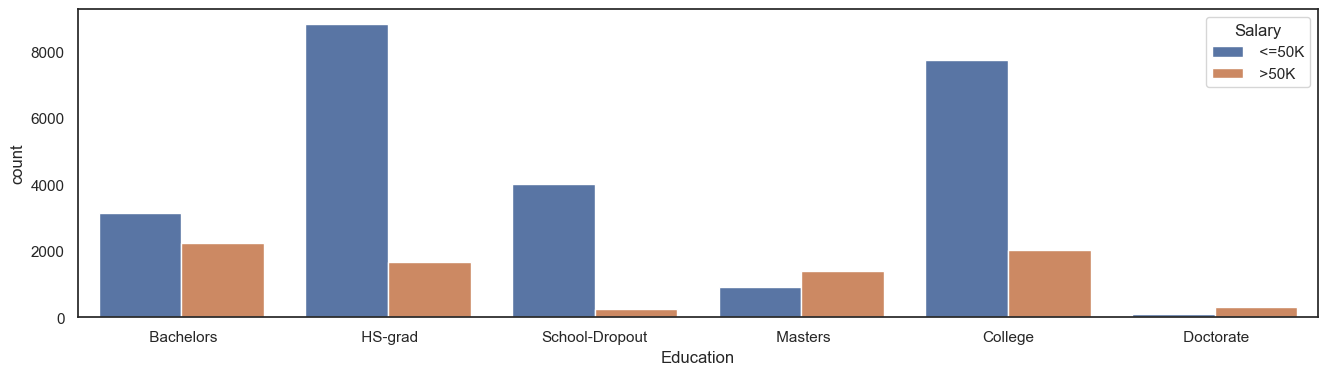

In [124]:
data['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'], 'School-Dropout', inplace=True)
data['Education'].replace([' Some-college', ' Assoc-acdm', ' Assoc-voc'], 'College', inplace=True)
data['Education'].replace(' Prof-school', ' Masters', inplace=True)

plt.figure(figsize=(16, 4))
sns.countplot(data=data, x='Education')

plt.figure(figsize=(16,4))
sns.countplot(data=data, x='Education', hue='Salary')

. almost all people got high educatio/university degrees earn more thn 50k per year
. followed by people got college certs
. really low number of people who dropped out from school earned more than 50k per year.

# Marital Status

<AxesSubplot:xlabel='Marital Status', ylabel='count'>

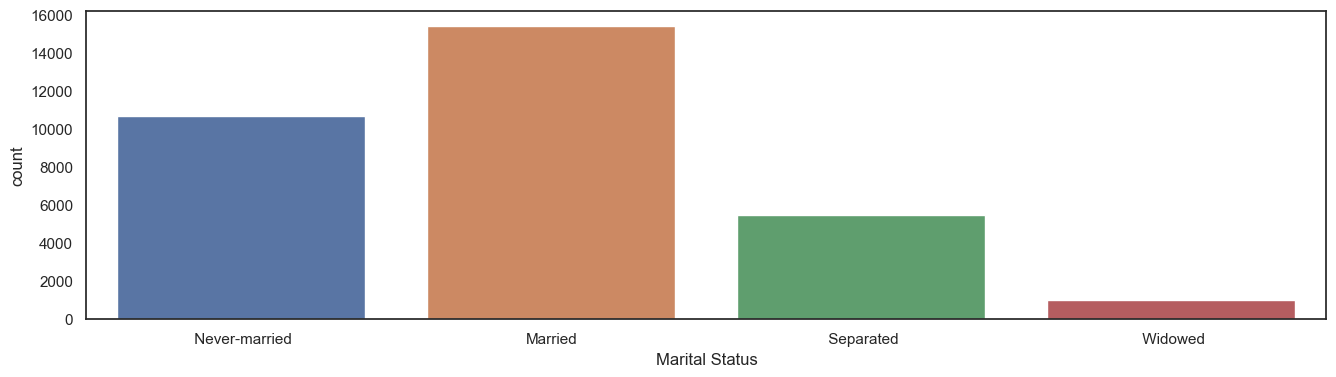

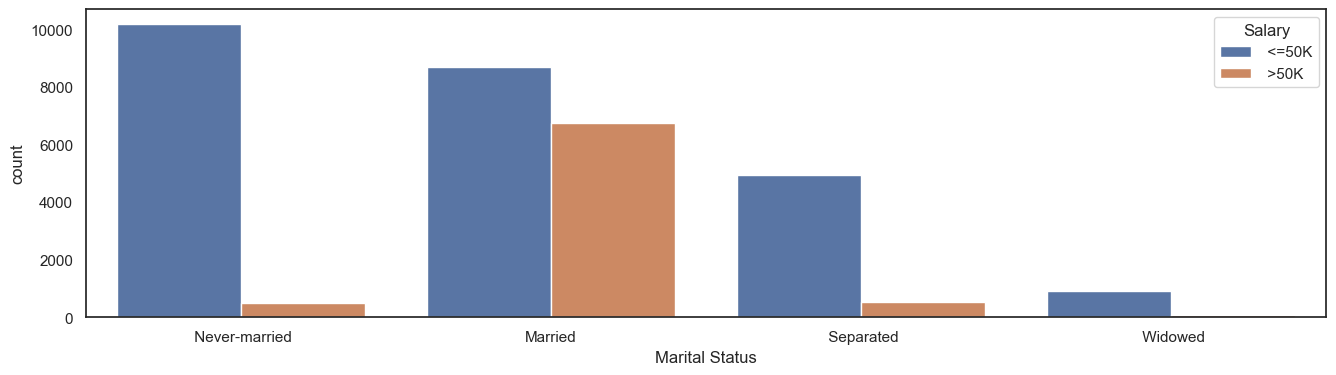

In [125]:
data['Marital Status'].replace([' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent'], 'Married', inplace=True)
data['Marital Status'].replace(' Divorced', ' Separated',inplace=True)

plt.figure(figsize=(16, 4))
sns.countplot(data=data, x='Marital Status')

plt.figure(figsize=(16,4))
sns.countplot(data=data, x='Marital Status', hue='Salary')

. almost all people with income higher than 50k per year are married
. singles seem like having lower income (<50k per year) 

In [126]:
fig = px.scatter(data, x="Country", y="Capital Gain", color='Sex',symbol="Sex")
        
fig.update_layout(title_text='Capital Gain between Female and Male in different countries')
fig.update_xaxes(title= 'Country',zeroline= False)
fig.update_yaxes(title= 'Capital gain',zeroline= False)

fig.update_layout(coloraxis_showscale=False)

fig.show()

In [65]:
fig = px.scatter(data, x="Country", y="Hours per week", color='Sex',symbol="Sex")
        
fig.update_layout(title_text='Hours per week Male vs Female')
fig.update_xaxes(title= 'Country',zeroline= False)
fig.update_yaxes(title= 'Hours per week',zeroline= False)

fig.update_layout(coloraxis_showscale=False)

fig.show()